# Name : Mustafa Ahmed Hemdan
## Data Science and Businedd Analytics 
## Problem : Predict the percentage score of a student based on the no. of study hours 

#### Importing Libraries 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set()


#### Loading data 

In [3]:
df = pd.read_csv('student_scores - student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [9]:
df['Hours'].nunique()

23

- the average no.of hours by students is 5 hrs, with score of around 52, the minimum hours by student is 1 hr, with score of 17, while the max hours by a student is 9.2, with a score of 95 which is the highest score acheived so far in out data 

###  ُExploring the data 

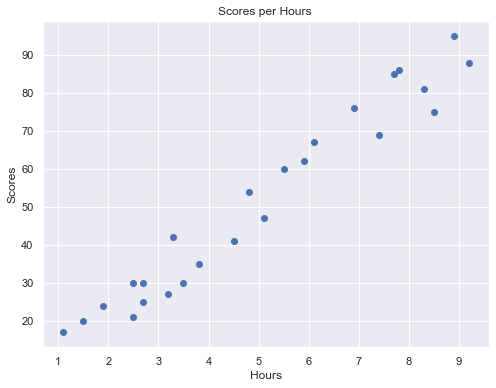

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df['Hours'], df['Scores'], marker = 'o')
plt.title('Scores per Hours ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

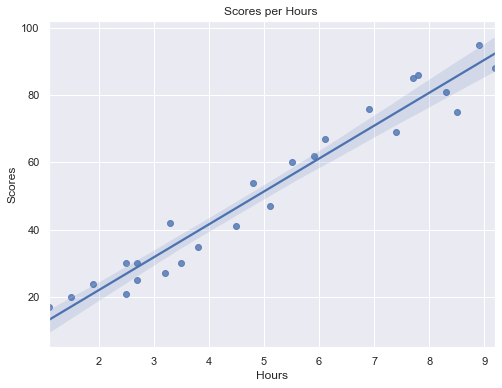

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Hours', y='Scores')
plt.title('Scores per Hours ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

- There's a positive corelation between the no. of hours and the scores, the more hours spent in studying the more scores the student will get 

#### Dividing the dataset into Features and Target 

In [28]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [29]:
X 

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [31]:
# Splitting the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [32]:
# Training the linear regression algorithm 
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
print('The Coefficient : ', model.coef_)
print('The Intercept: ', model.intercept_)

The Coefficient :  [9.71054094]
The Intercept:  2.794196676599803


In [35]:
y_hat = model.coef_[0] * X_train + model.intercept_
y_hat

array([[39.69425223],
       [17.36000808],
       [33.86792767],
       [46.49163089],
       [89.21801101],
       [85.33379464],
       [36.78108995],
       [29.0126572 ],
       [21.24422446],
       [49.40479317],
       [62.02849639],
       [78.53641598],
       [56.20217183],
       [77.56536189],
       [13.47579171],
       [74.65219961],
       [92.13117329]])

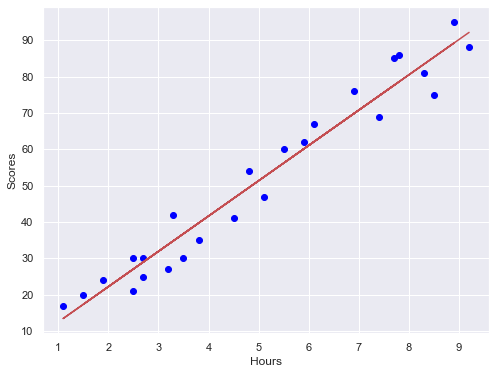

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(df['Hours'], df['Scores'], color = 'blue')
plt.plot(X_train, y_hat, '-r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Prediction and Evaluation 

In [38]:
y_pred = model.predict(X_test)
y_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [39]:
# Comparing the test and the predicted data 
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


In [46]:
# the predicted score if the student studies for 9.25 hrs/day
hour = np.array([[9.25]])
predict = model.predict(hour)
print('the number of hours: ', hour[0][0])
print('THe Predicted Score: ', predict[0])

the number of hours:  9.25
THe Predicted Score:  92.61670033840096


In [49]:
# Evaluation 
from sklearn import metrics 

print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, y_pred))
print("R2-score: %.2f" % metrics.r2_score(y_test, y_pred))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

Mean absolute error: 4.50
R2-score: 0.95
Mean Squared Error: 23.62
